## Groupe 2: Mouhamadou Abdoulaye Seck, Ousmane Diallo, Nicolas Pehlivanian


# abdouseck.tiv@gmail.com

In [ ]:
!git clone https://github.com/Pech82/Projet-clustering.git

Cloning into 'Projet-clustering'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("/content/Projet-clustering/data.csv")

In [ ]:
data

,PLAYER,CLUB,POS,OVR,PAC,SHO,PAS,DRI,DEF,PHY
0,A.J. DeLaGarza,New England,RB,65,64,48,61,62,63,68
1,Aaron Herrera,Salt Lake,RB,66,68,32,54,62,65,73
2,Aaron Schoenfeld,Austin,ST,62,62,61,52,58,29,72
3,Aboubacar Keita,Columbus,CB,65,80,27,51,50,63,73
4,Abraham Rodriguez,Colorado,GK,53,54,52,51,59,25,54
...,...,...,...,...,...,...,...,...,...,...
619,Zorhan Bassong,Montréal,LWB,60,74,37,54,63,54,66
620,Álvaro Barreal,Cincinnati,RW,65,79,63,56,69,41,56
621,Érick Torres,Atlanta,ST,67,62,68,66,66,34,70
622,Éverton Luiz,Salt Lake,CDM,68,48,55,65,67,67,66


In [ ]:
data.shape

(624, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PLAYER  624 non-null    object
 1   CLUB    624 non-null    object
 2   POS     624 non-null    object
 3   OVR     624 non-null    int64 
 4   PAC     624 non-null    int64 
 5   SHO     624 non-null    int64 
 6   PAS     624 non-null    int64 
 7   DRI     624 non-null    int64 
 8   DEF     624 non-null    int64 
 9   PHY     624 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 48.9+ KB


In [ ]:
power_team=data[3:9].groupby(['CLUB']).mean()
power_team

,OVR,PAC,SHO,PAS,DRI,DEF,PHY
CLUB,,,,,,,
Colorado,53.0,54.0,52.0,51.0,59.0,25.0,54.0
Columbus,65.0,80.0,27.0,51.0,50.0,63.0,73.0
Houston,68.0,70.0,56.5,63.5,67.0,60.0,63.5
Nashville,63.0,76.0,63.0,54.0,64.0,39.0,65.0
New England,71.0,68.0,70.0,56.0,67.0,30.0,75.0


#EDA

In [ ]:
df=data.copy()
columns_object = []
columns_int = []
for col in df.select_dtypes('object'):
    columns_object.append(col)
for col in df.select_dtypes('int64'):
    columns_int.append(col)

In [ ]:
def Best(var):
  D=df[df[var]==df[var].max()]
  for col in columns_int :
    if col==var:
      continue
    else:
      DD=D[D[col]==D[col].max()]
      print(f"Le Meilleur {var} et {col} est : ", DD["PLAYER"].values, "; Club : ", DD["CLUB"].values)

In [ ]:
Best("OVR")

Le Meilleur OVR et PAC est :  ['Sergio Santos'] ; Club :  ['Philadelphia']
Le Meilleur OVR et SHO est :  ['Bradley Wright-Phillips' 'Dániel Sallói'] ; Club :  ['Columbus' 'Kansas City']
Le Meilleur OVR et PAS est :  ['Federico Higuaín'] ; Club :  ['Miami']
Le Meilleur OVR et DRI est :  ['Latif Blessing'] ; Club :  ['LAFC']
Le Meilleur OVR et DEF est :  ['Jack Elliott'] ; Club :  ['Philadelphia']
Le Meilleur OVR et PHY est :  ['Bryan Acosta' 'Eric Remedi'] ; Club :  ['Dallas' 'San Jose']


In [ ]:
data_int = df[columns_int]
data_obj = df[columns_object]

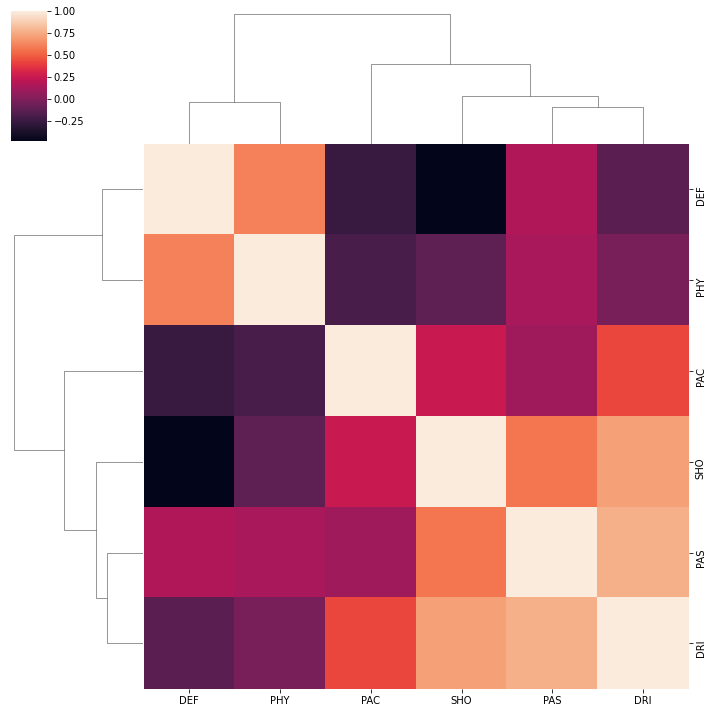

In [ ]:
d = data_int.copy()
d = d.drop(['OVR'],axis=1)
sns.clustermap(d.corr())

On constate un regroupement des compétences d'attaque et défence 

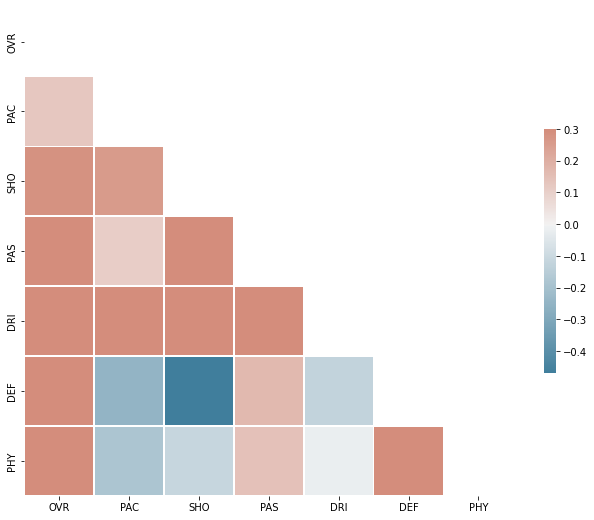

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

corr = data_int.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

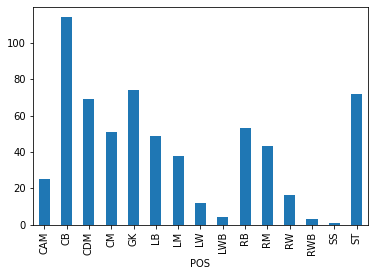

In [ ]:
data.groupby("POS").size().plot(kind="bar")

# 

In [ ]:
df_aff = data_int.copy()
df_aff['POS'] = data_obj['POS']
#df_aff
#pd.concat([df_aff,pd.DataFrame(data_obj['POS'])], axis=1)

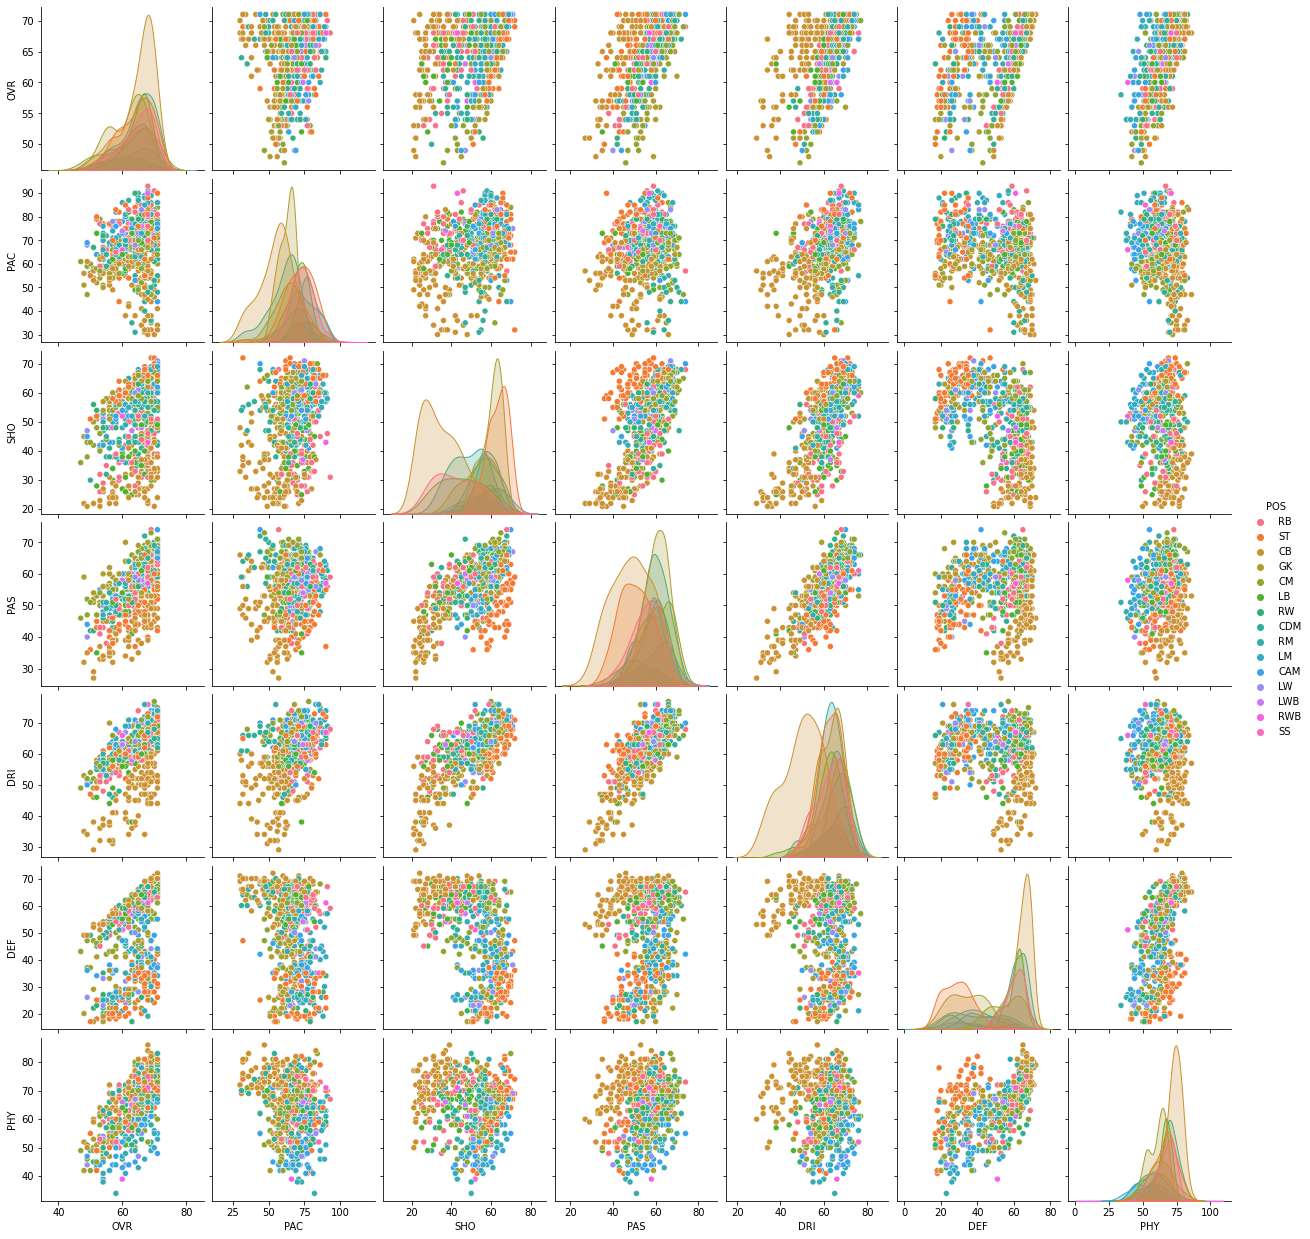

In [ ]:
sns.pairplot(df_aff, hue = "POS")

#Feature Engineering

In [ ]:
from sklearn import preprocessing
def Encode(data,col):
  X = data[col].values
  X = X.reshape(-1,1)
  enc = preprocessing.OrdinalEncoder(categories='auto')
  enc.fit(X)
  return(enc.transform(X))

In [ ]:
df_aff["POS_encod"] = Encode(df_aff,'POS')
df_aff = df_aff.drop(['POS'],axis=1)
df_aff

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,POS_encod
0,65,64,48,61,62,63,68,9.0
1,66,68,32,54,62,65,73,9.0
2,62,62,61,52,58,29,72,14.0
3,65,80,27,51,50,63,73,1.0
4,53,54,52,51,59,25,54,4.0
...,...,...,...,...,...,...,...,...
619,60,74,37,54,63,54,66,8.0
620,65,79,63,56,69,41,56,11.0
621,67,62,68,66,66,34,70,14.0
622,68,48,55,65,67,67,66,2.0


In [ ]:
X=df_aff.copy()
scaler_X = preprocessing.StandardScaler().fit(X)
scaler_X = scaler_X.transform(X)
scaler_X

array([[ 0.21816644, -0.20175756, -0.20859105, ...,  0.86548752,
         0.38478305,  0.80362281],
       [ 0.40089914,  0.13896428, -1.4631531 , ...,  0.99265122,
         0.90002903,  0.80362281],
       [-0.33003165, -0.37211848,  0.81074062, ..., -1.2962953 ,
         0.79697983,  1.95060505],
       ...,
       [ 0.58363183, -0.37211848,  1.35961152, ..., -0.97838606,
         0.59088144,  1.95060505],
       [ 0.76636453, -1.56464491,  0.34027985, ...,  1.11981491,
         0.17868466, -0.80215232],
       [-0.69549704, -0.20175756, -0.99269233, ...,  0.35683274,
        -0.02741373, -0.11396298]])

#KMeans avant ACP

In [ ]:
from sklearn.cluster import KMeans

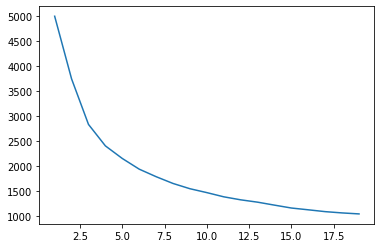

In [ ]:
inertia = []
K_range = range(1,20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(scaler_X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)

#Avec ACP

In [ ]:
from sklearn.decomposition import PCA
# TBD
pca = PCA(n_components=4)
X_red = pca.fit_transform(scaler_X)
print("nb colonnes initiales Postes : ",scaler_X.shape[1])
print(f"nb colonnes réduit aprés l'ACP : {X_red.shape[1]}")
print(f"L'ACP a réussi à représenter {int(pca.explained_variance_ratio_.sum()*100)} % des données sur les {X_red.shape[1]} nouveaux axes" )
print("pca.singular_values_ : ", pca.singular_values_)
print("pca.explained_variance_ratio_ : ", pca.explained_variance_ratio_)

nb colonnes initiales Postes :  8
nb colonnes réduit aprés l'ACP : 4
L'ACP a réussi à représenter 91 % des données sur les 4 nouveaux axes
pca.singular_values_ :  [43.25204216 40.08846281 25.06384356 21.11162039]
pca.explained_variance_ratio_ :  [0.37474743 0.32193206 0.1258406  0.08928296]


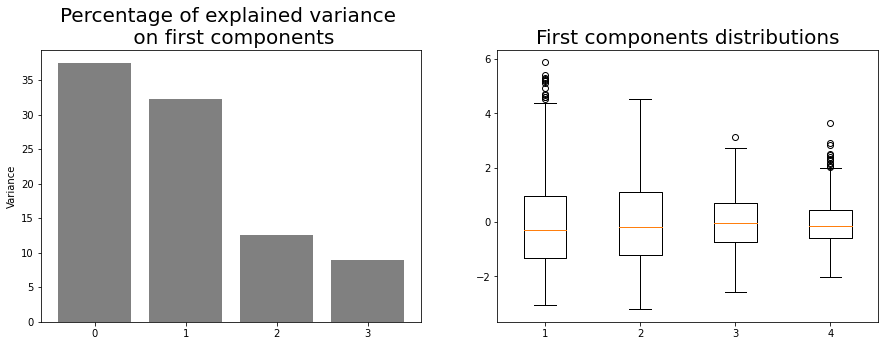

In [ ]:
import matplotlib.pyplot as plt
def plot_variance_acp(fig, acp, X_acp, whis=1.5):
    n=len(acp.singular_values_)
    ax = fig.add_subplot(1,2,1)
    ax.bar(range(n), acp.explained_variance_ratio_[:n]*100, align='center',color='grey', ecolor='black')
    ax.set_xticks(range(n))
    ax.set_ylabel("Variance")
    ax.set_title("", fontsize=35)
    ax.set_title("Percentage of explained variance \n on first components", fontsize=20)

    ax = fig.add_subplot(1,2,2)
    box=ax.boxplot(X_acp[:,0:n], whis=whis)
    ax.set_title("First components distributions", fontsize=20)
fig = plt.figure(figsize=(15,5))
plot_variance_acp(fig, pca, X_red, whis=1.5)

In [ ]:
CMAP = plt.get_cmap("Set1")
y_labels = df['POS'].values
K=np.unique(df_aff['POS_encod'].values)
V=np.unique(y_labels)
LABEL_DIC = {}
for k,v in zip(K,V):
  LABEL_DIC[k]=v
y_label = np.unique(y_labels)
COLOR_DIC = {v:CMAP(int(k)) for k,v in LABEL_DIC.items()}
LABELS = [LABEL_DIC[c] for c in range(14)]
COLOR_LIST = [COLOR_DIC[l] for l in LABELS]
colors=[COLOR_DIC[yy] for yy in y_labels]
markersizes = [20 for yy in df_aff['POS_encod']]

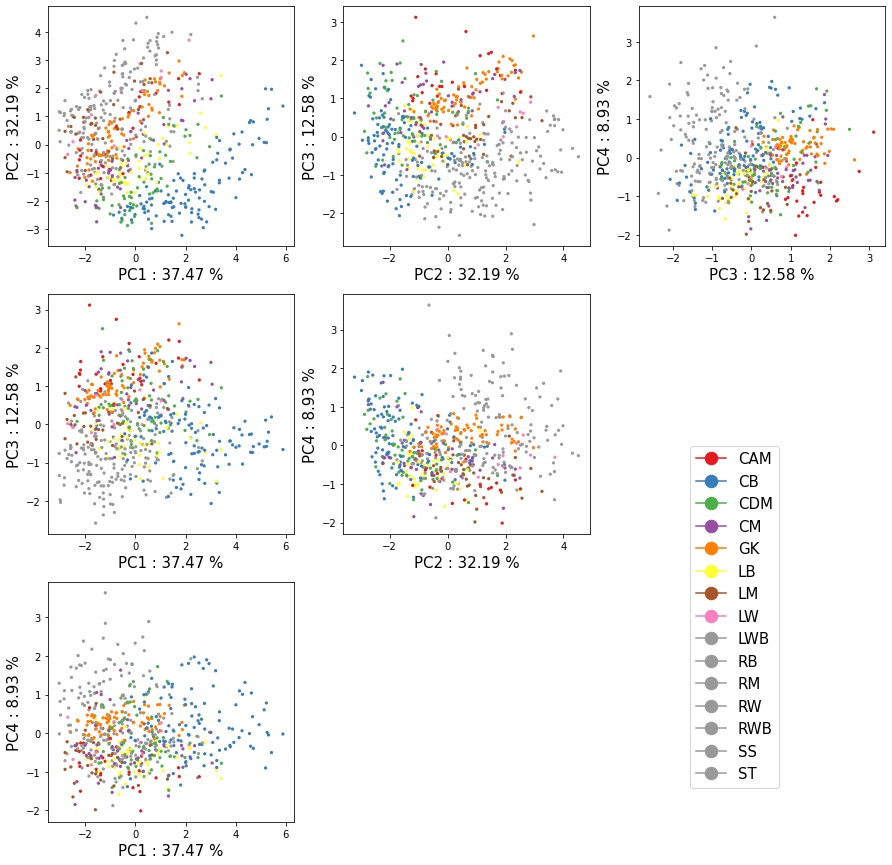

In [ ]:
def plot_pca(ax, X, acp, nbc, nbc2, colors, markersizes):
    ax.scatter(X[:,nbc-1],X[:,nbc2-1],marker=".", color= colors, s=markersizes)
    ax.set_xlabel("PC%d : %.2f %%" %(nbc,acp.explained_variance_ratio_[nbc-1]*100), fontsize=15)
    ax.set_ylabel("PC%d : %.2f %%" %(nbc2,acp.explained_variance_ratio_[nbc2-1]*100), fontsize=15)

fig = plt.figure(figsize= (15,15))
count = 0
for nbc, nbc2,count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    plot_pca(ax, X_red, pca, nbc, nbc2, colors, markersizes)

#Build legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=COLOR_DIC[act],marker=".", linestyle=None, markersize=25, label=act)for act in LABEL_DIC.values()]
plt.legend(handles=legend_elements,loc='upper right', bbox_to_anchor=(3, 1.6),fontsize=15)
plt.show()

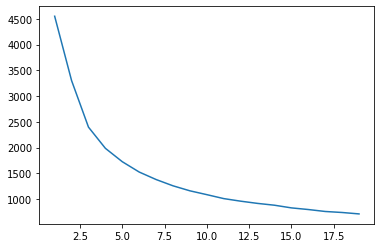

In [ ]:
inertia = []
K_range = range(1,20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X_red)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)

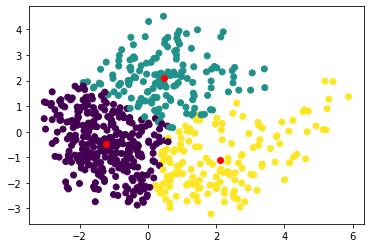

In [ ]:
model = KMeans(n_clusters=3)
model.fit(X_red)
model.predict(X_red)
plt.scatter(X_red[:,0],X_red[:,1],c=model.predict(X_red))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')

# Seconde méthode one hot encoding TSNE

In [17]:
post = data["POS"]

X_post = pd.get_dummies(post)

data_hot = pd.concat([data,X_post],axis=1)
data_hot

,PLAYER,CLUB,POS,OVR,PAC,SHO,PAS,DRI,DEF,PHY,...,LB,LM,LW,LWB,RB,RM,RW,RWB,SS,ST
0,A.J. DeLaGarza,New England,RB,65,64,48,61,62,63,68,...,0,0,0,0,1,0,0,0,0,0
1,Aaron Herrera,Salt Lake,RB,66,68,32,54,62,65,73,...,0,0,0,0,1,0,0,0,0,0
2,Aaron Schoenfeld,Austin,ST,62,62,61,52,58,29,72,...,0,0,0,0,0,0,0,0,0,1
3,Aboubacar Keita,Columbus,CB,65,80,27,51,50,63,73,...,0,0,0,0,0,0,0,0,0,0
4,Abraham Rodriguez,Colorado,GK,53,54,52,51,59,25,54,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Zorhan Bassong,Montréal,LWB,60,74,37,54,63,54,66,...,0,0,0,1,0,0,0,0,0,0
620,Álvaro Barreal,Cincinnati,RW,65,79,63,56,69,41,56,...,0,0,0,0,0,0,1,0,0,0
621,Érick Torres,Atlanta,ST,67,62,68,66,66,34,70,...,0,0,0,0,0,0,0,0,0,1
622,Éverton Luiz,Salt Lake,CDM,68,48,55,65,67,67,66,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data_hot2 = data_hot.drop(["PLAYER","CLUB","POS"],axis=1)
data_hot2

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,CAM,CB,CDM,...,LB,LM,LW,LWB,RB,RM,RW,RWB,SS,ST
0,65,64,48,61,62,63,68,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,66,68,32,54,62,65,73,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,62,62,61,52,58,29,72,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,65,80,27,51,50,63,73,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,53,54,52,51,59,25,54,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,60,74,37,54,63,54,66,0,0,0,...,0,0,0,1,0,0,0,0,0,0
620,65,79,63,56,69,41,56,0,0,0,...,0,0,0,0,0,0,1,0,0,0
621,67,62,68,66,66,34,70,0,0,0,...,0,0,0,0,0,0,0,0,0,1
622,68,48,55,65,67,67,66,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn import preprocessing
scaler_X_hot = preprocessing.StandardScaler().fit(data_hot2)
scaler_X_hot = scaler_X_hot.transform(data_hot2)
scaler_X_hot

array([[ 0.21816644, -0.20175756, -0.20859105, ..., -0.0695048 ,
        -0.04006415, -0.36115756],
       [ 0.40089914,  0.13896428, -1.4631531 , ..., -0.0695048 ,
        -0.04006415, -0.36115756],
       [-0.33003165, -0.37211848,  0.81074062, ..., -0.0695048 ,
        -0.04006415,  2.76887462],
       ...,
       [ 0.58363183, -0.37211848,  1.35961152, ..., -0.0695048 ,
        -0.04006415,  2.76887462],
       [ 0.76636453, -1.56464491,  0.34027985, ..., -0.0695048 ,
        -0.04006415, -0.36115756],
       [-0.69549704, -0.20175756, -0.99269233, ..., -0.0695048 ,
        -0.04006415, -0.36115756]])

In [38]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss_hot=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,30):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(scaler_X_hot)
    wcss_hot.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

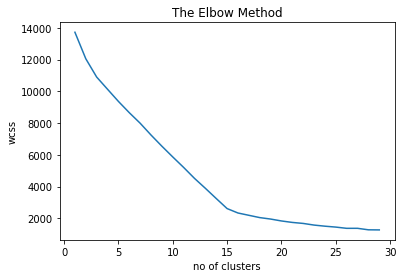

In [39]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,30), wcss_hot)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [41]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaler_X_hot, kmeans.labels_, metric='euclidean')
score

0.384190511736748

In [42]:
import numpy as np
from sklearn.manifold import TSNE
X3 = scaler_X_hot
X_embedded2 = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X3)
X_embedded2.shape 

(624, 2)

In [48]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wcss_hot2=[]
sil_score=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(2,30):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_embedded2)
    wcss_hot2.append(kmeans.inertia_)
    
    score = silhouette_score(X_embedded2, kmeans.labels_, metric='euclidean')
    sil_score.append(score)

    #inertia_ is the formula used to segregate the data points into clusters

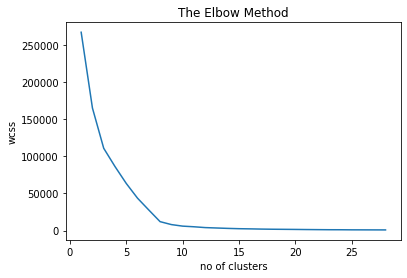

In [51]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,29), wcss_hot2)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

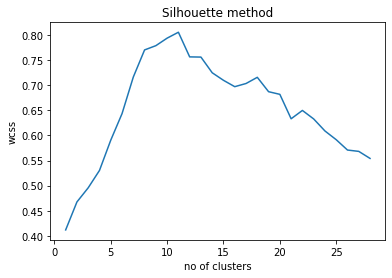

11


In [59]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,29), sil_score)
plt.title('Silhouette method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()
clust_opti = np.argmax(sil_score)+1
print(clust_opti)

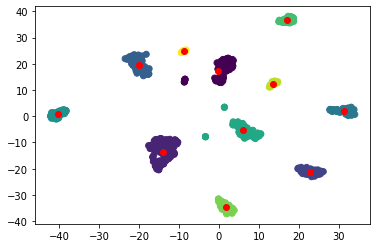

In [60]:
model2 = KMeans(n_clusters=clust_opti )
model2.fit(X_embedded2)
model2.predict(X_embedded2)
plt.scatter(X_embedded2[:,0],X_embedded2[:,1],c=model2.predict(X_embedded2))
plt.scatter(model2.cluster_centers_[:,0],model2.cluster_centers_[:,1],c='r')

In [65]:
model2.labels_
len(model2.labels_)

624

In [71]:
data3 = data
data3["cluster"]=model2.labels_
data3= data[["POS","cluster"]]
data3

,POS,cluster
0,RB,2
1,RB,2
2,ST,3
3,CB,1
4,GK,0
...,...,...
619,LWB,6
620,RW,10
621,ST,3
622,CDM,6
